# <center><b>Decision trees. Tree pruning.</b></center>
### <center><b>Introduction.</b></center>

Decision trees in machine learning are like a map where each step involves decisions based on features, ultimately leading to predictions. Trees are an important concept in simplifying complex decision-making processes for tasks like classification and regression.

However simplicity comes with its challenges. Decision trees, if left unchecked, tend to overfit – becoming overly complex and losing their ability to generalize beyond the training data. And this is the place where tree pruning comes into play, to solve the problem with overfitting trees, and to refine and optimize decision trees for real-world accuracy. Pruning is implemented by reducing their depth and eliminating branches that have minimal impact on predictive accuracy.


### <center><b>Methods and approaches of tree pruning.</b></center>


There are two main approaches in tree pruning.
<ol>
    <li><b>Pre-pruning</b></li>
    <li><b>Post-pruning</b></li>
</ol>
<br>

To understand the difference between these two let’s imagine that you have built up your decision tree and it’s fully functional and ready to use. Then you go and analyze your decision tree and you notice some weak and unnecessary branches so you decide on removing these branches. This step is called post-pruning because you decided to remove these branches after the decision tree is complete. 

On the other hand, pre-pruning is when you stop the decision tree from branching. If you see that the branch will not add the value and will only increase the complexity of the decision tree
<br>

## <b>Pre-pruning has two methods:</b>

<ol>
    <li><i>Maximum Depth (Depth Limit)</i></li>
    <li><i>Minimum Samples per Leaf</i></li>
</ol>

### <b>Maximum depth method:</b>

The maximum depth parameter is a pre-pruning technique that limits the depth of the decision tree. The depth of a tree is the length of the longest path from the root to a leaf. By setting a maximum depth, you control the tree's complexity and prevent it from becoming too intricate, which can lead to overfitting.


<b>How does it work:</b>

<ul>
    <li>The algorithm grows the tree by making decisions based on features until it reaches the specified maximum depth. </li>
    <li>Once the tree reaches this depth, it stops splitting nodes and becomes a complete decision tree.</li>
</ul>


<b>Usage:</b>
<ul>
    <li>Setting an appropriate maximum depth is crucial. If the depth is too shallow, the tree may be too simple and fail to capture the underlying patterns in the data. If it's too deep, the tree might overfit and not generalize well to new, unseen data.</li>
</ul>

### <b>Minimum Samples per Leaf:</b>


The minimum samples per leaf is another pre-pruning technique that controls the minimum number of samples required for a node to be considered a leaf. A leaf node is a terminal node in a decision tree where a final prediction or decision is made.

<b>How does it work:</b>


<ul>
    <li>As the tree grows, when a potential split is considered, the algorithm checks if each resulting child node (after the split) would have at least the specified minimum number of samples.</li>
    <li>If a node has fewer samples than the specified minimum, the split is not performed, and the node becomes a leaf.</li>
</ul>

<b>Usage:</b>
<ul>
    <li>This parameter helps prevent the creation of nodes with very few samples, which might capture noise in the data. By setting a minimum sample per leaf, you ensure that each leaf node has enough data points to make a reliable prediction.
    </li>
</ul>

## <b>Post-pruning has two methods of pruning:</b>
<ol>
    <li><i>Cost-Complexity Pruning (CCP)</i></li>
    <li><i>Reduced Error Pruning (REP)</i></li>
</ol>

### <b>Cost-Complexity Pruning:</b>

Cost-Complexity Pruning is a post-pruning method for decision trees. It involves growing the tree to its maximum size and then selectively pruning branches based on a cost-complexity parameter.


<b>How does it work:</b>

<ul>
    <li>First of all for each subtree, calculate a measure of impurity, often using Gini impurity or entropy.</li>
    <li>Then, introduce a cost-complexity parameter that balances the accuracy and complexity of the tree. The cost-complexity is proportional to the number of nodes in the subtree.</li>
    <li>Compute the total cost by adding the impurity measure and the cost-complexity term.</li>
    <li>Iteratively prune branches with the smallest increase in total cost. This process continues until the optimal level of pruning is achieved.</li>
</ul>

<b>Usage:</b>

<ul>
    <li>Cost-Complexity Pruning is suitable when a trade-off between tree complexity and accuracy is desired. </li>
    <li>It helps prevent overfitting and improves the tree's ability to generalize to unseen data.</li>
    <li>The cost-complexity parameter allows fine-tuning based on the specific requirements of the problem.</li>
</ul>


### <b>Reduced Error Pruning:</b>

Reduced Error Pruning is a post-pruning method that evaluates the impact of pruning on a validation set. It involves growing the tree to its maximum size and then selectively pruning branches that do not significantly improve predictive accuracy.

<b>How does it work:</b>

<ul>
    <li>The first step is to have a small part of the training data sit aside as a kind of judge, called the validation set.</li>
    <li>Next, we let the decision tree grow as big as it wants using the rest of the training data.</li>
    <li>Now, we go through an iterative process. We snip off branches one by one and check if it makes a real difference in predicting stuff on the validation set.</li>
    <li>We keep pruning until trimming more branches doesn't do much to make the tree better at predicting.</li>
</ul>

<b>Usage:</b>

<ul>
    <li>Reduced Error Pruning is effective when there is a need to optimize the tree's structure based on its performance on a validation set.</li>
    <li>It helps prevent overfitting by removing branches that do not contribute significantly to improving accuracy.</li>
    <li>This method is particularly useful in situations where a separate validation set is available for model evaluation.</li>
</ul>

<br>
In conclusion, tree pruning is an important technique in decision tree-based algorithms, such as CART (Classification and Regression Trees) and Random Forests. Properly pruned trees can strike a balance between model complexity and predictive accuracy, making them more robust and interpretable for various machine learning tasks.


##### Python implementation








### Pre-pruning approach

<b>Import neccessary libraries</b>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

<b>Use dataset from <i>sklearn.dataset</i></b>

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

<b>Split the data into training and testing sets</b>

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<b>Data Visualization</b>

In [4]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y

def scatter_plot(x_feature, y_feature):
    
    iris_df['species'] = [iris.target_names[target] for target in iris_df['target']]
    
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(
        data=iris_df, 
        x=x_feature, 
        y=y_feature, 
        hue='species',  
        style='species',  
        palette="deep"
    )
    plt.title(f'Scatter plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title='Species')
    plt.show()

x_feature_dropdown = widgets.Dropdown(options=iris.feature_names, value='sepal length (cm)', description='X-axis:')
y_feature_dropdown = widgets.Dropdown(options=iris.feature_names, value='sepal width (cm)', description='Y-axis:')

interactive(scatter_plot, x_feature=x_feature_dropdown, y_feature=y_feature_dropdown)

interactive(children=(Dropdown(description='X-axis:', options=('sepal length (cm)', 'sepal width (cm)', 'petal…

In [5]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[target] for target in iris.target]

def box_plot(feature, setosa, versicolor, virginica):
    plot_data = iris_df[iris_df['species'].isin(
        [species for species, include in zip(iris.target_names, [setosa, versicolor, virginica]) if include])]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y=feature, data=plot_data)
    plt.title(f'Box Plot of {feature}')
    plt.show()

feature_dropdown = widgets.Dropdown(options=iris.feature_names, value=iris.feature_names[0], description='Feature:')

setosa_checkbox = widgets.Checkbox(value=True, description=iris.target_names[0])
versicolor_checkbox = widgets.Checkbox(value=True, description=iris.target_names[1])
virginica_checkbox = widgets.Checkbox(value=True, description=iris.target_names[2])

interactive(box_plot, feature=feature_dropdown, setosa=setosa_checkbox, versicolor=versicolor_checkbox, virginica=virginica_checkbox)

interactive(children=(Dropdown(description='Feature:', options=('sepal length (cm)', 'sepal width (cm)', 'peta…

<b>Decision tree</b>

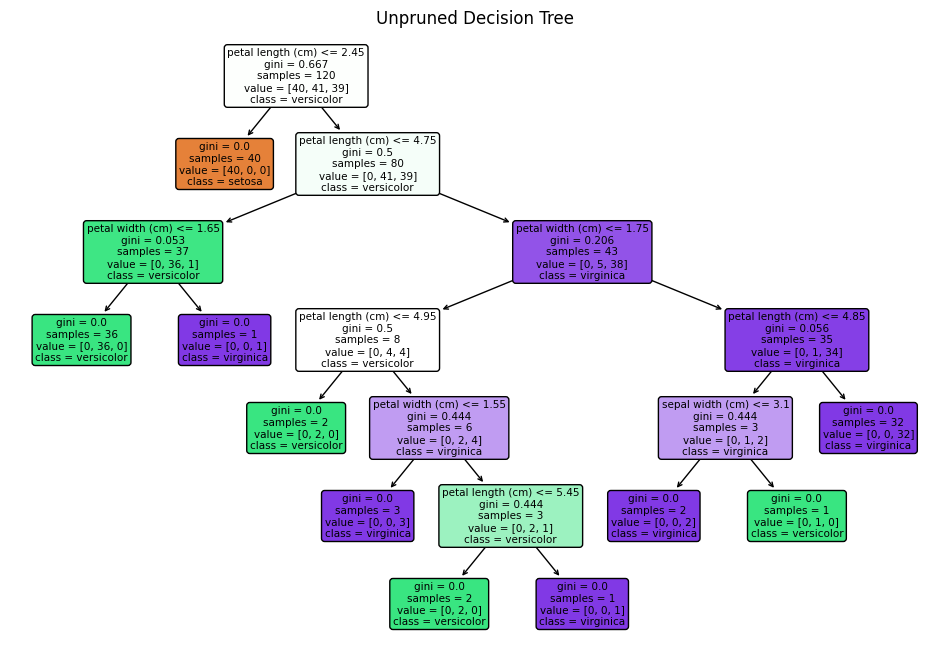

In [6]:
tree_unpruned = DecisionTreeClassifier(random_state=42)
tree_unpruned.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree_unpruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Unpruned Decision Tree")
plt.show()

<b>Now prune tree with max depth (Pre-pruning approach)</b>

In [7]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

def plot_tree_and_feature_importance(depth=3):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    plt.figure(figsize=(12, 8))
    plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
    plt.title(f"Decision Tree (Max Depth: {depth})")
    plt.show()

    importances = tree.feature_importances_

    plt.figure(figsize=(8, 4))
    plt.barh(range(len(importances)), importances, align='center')
    plt.yticks(range(len(importances)), iris.feature_names)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance in Decision Tree')
    plt.show()

depth_slider = widgets.IntSlider(value=3, min=1, max=10, step=1, description='Tree Depth:')

interactive(plot_tree_and_feature_importance, depth=depth_slider)


interactive(children=(IntSlider(value=3, description='Tree Depth:', max=10, min=1), Output()), _dom_classes=('…

### Post-pruning approach

<b>Import neccessary libraries</b>

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

<b>Use dataset from <i>sklearn.dataset</i></b>

In [9]:
iris = load_iris()
X = iris.data
y = iris.target

<b>Split the data into training and testing sets</b>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

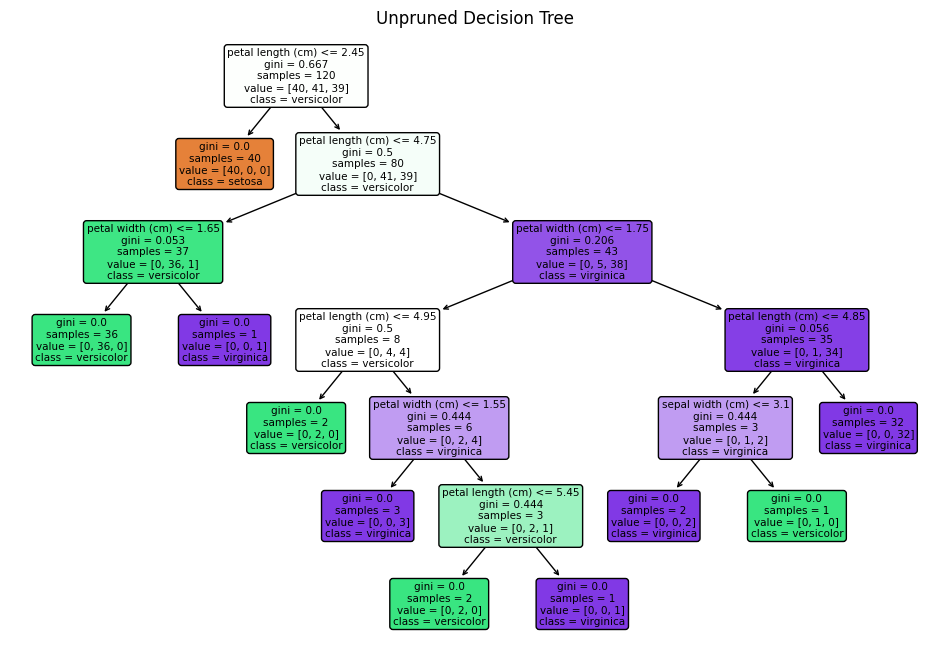

In [11]:
# Start of unpruned tree section
tree_unpruned = DecisionTreeClassifier(random_state=42)
tree_unpruned.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree_unpruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Unpruned Decision Tree")
plt.show()
# End of unpruned tree section

<b>Now prune tree with cost-complexity pruning (Post-pruning approach)</b>

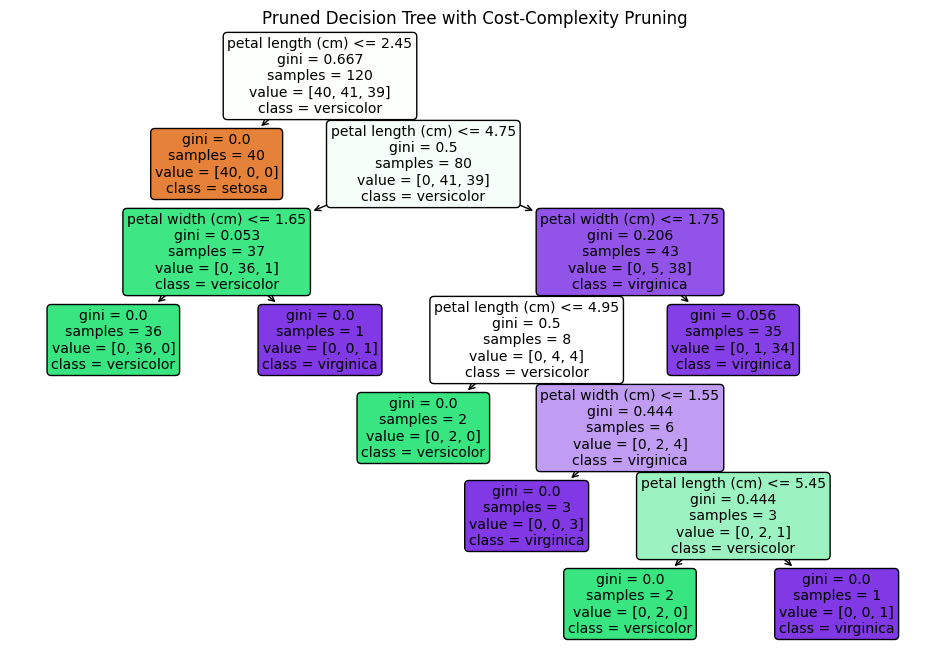

In [12]:
tree_pruned = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
tree_pruned.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Pruned Decision Tree with Cost-Complexity Pruning")
plt.show()

<b>Decision boundary of the trained model</b>

In [13]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def plot_decision_boundary(clf, X, y, features, target_names, plot_step=0.02, cmap='viridis'):
    X = iris.data[:, features]
    y = iris.target

    clf.fit(X, y)

    plt.figure(figsize=(10, 8))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)

    for i, color in zip(range(len(target_names)), "ryb"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                    cmap=cmap, edgecolor='black', s=15)

    plt.title("Decision surface of a decision tree using paired features")
    plt.xlabel(iris.feature_names[features[0]])
    plt.ylabel(iris.feature_names[features[1]])
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

feature_1_dropdown = widgets.Dropdown(options=list(range(len(iris.feature_names))), value=0, description=iris.feature_names[0])
feature_2_dropdown = widgets.Dropdown(options=list(range(len(iris.feature_names))), value=1, description=iris.feature_names[1])

depth_slider = widgets.IntSlider(value=3, min=1, max=10, step=1, description='Max Depth')

def update_plot(feature_1, feature_2, depth):
    plot_decision_boundary(DecisionTreeClassifier(ccp_alpha=0.01, max_depth=depth, random_state=42),
                           X_train, y_train,
                           features=[feature_1, feature_2],
                           target_names=iris.target_names)

interactive_plot = interactive(update_plot,
                               feature_1=feature_1_dropdown,
                               feature_2=feature_2_dropdown,
                               depth=depth_slider)
display(interactive_plot)

interactive(children=(Dropdown(description='sepal length (cm)', options=(0, 1, 2, 3), value=0), Dropdown(descr…